<a href="https://colab.research.google.com/github/sergioaceros/PythonETL/blob/main/Online_Retail_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Instalamos las librerias necesarias**

Configuración del Entorno de Trabajo

Primero, asegúrate de tener instaladas las siguientes bibliotecas en tu entorno de Python:

*   Pandas
*   Numpy
*   Matplotlib
*   Seaborn
*   Scikit-Learn

In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn

**Importamos las librerias y cargamos el Dataset de Kaggle**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Cargar el dataset
#Carga el dataset desde un archivo CSV.

file_path = '/content/OnlineRetail.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')

In [3]:
# Mostrar las primeras filas del dataset (Muestra las primeras filas del dataset)
print(data.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [4]:
# Información general del dataset (Proporciona información general sobre el dataset, incluyendo el tipo de datos y la cantidad de valores faltantes.)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


In [5]:
# Descripcion estadistica del Dataset (Muestra una descripción estadística del dataset.)
print(data.describe)

<bound method NDFrame.describe of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  Custo

<function matplotlib.pyplot.show(close=None, block=None)>

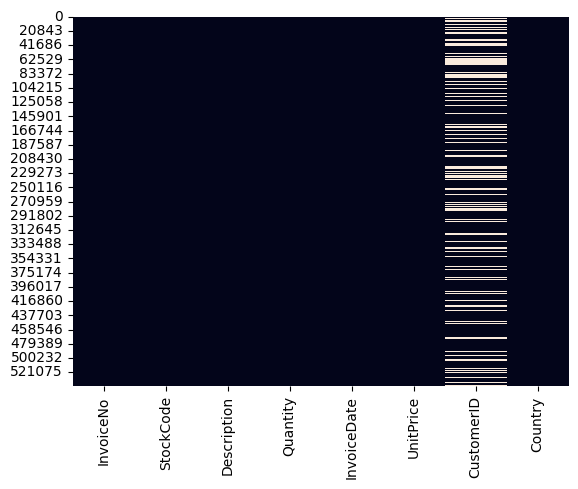

In [6]:
# Visualización de datos faltantes (Visualiza los datos faltantes con un heatmap.)
sns.heatmap(data.isnull(), cbar=False)
plt.show

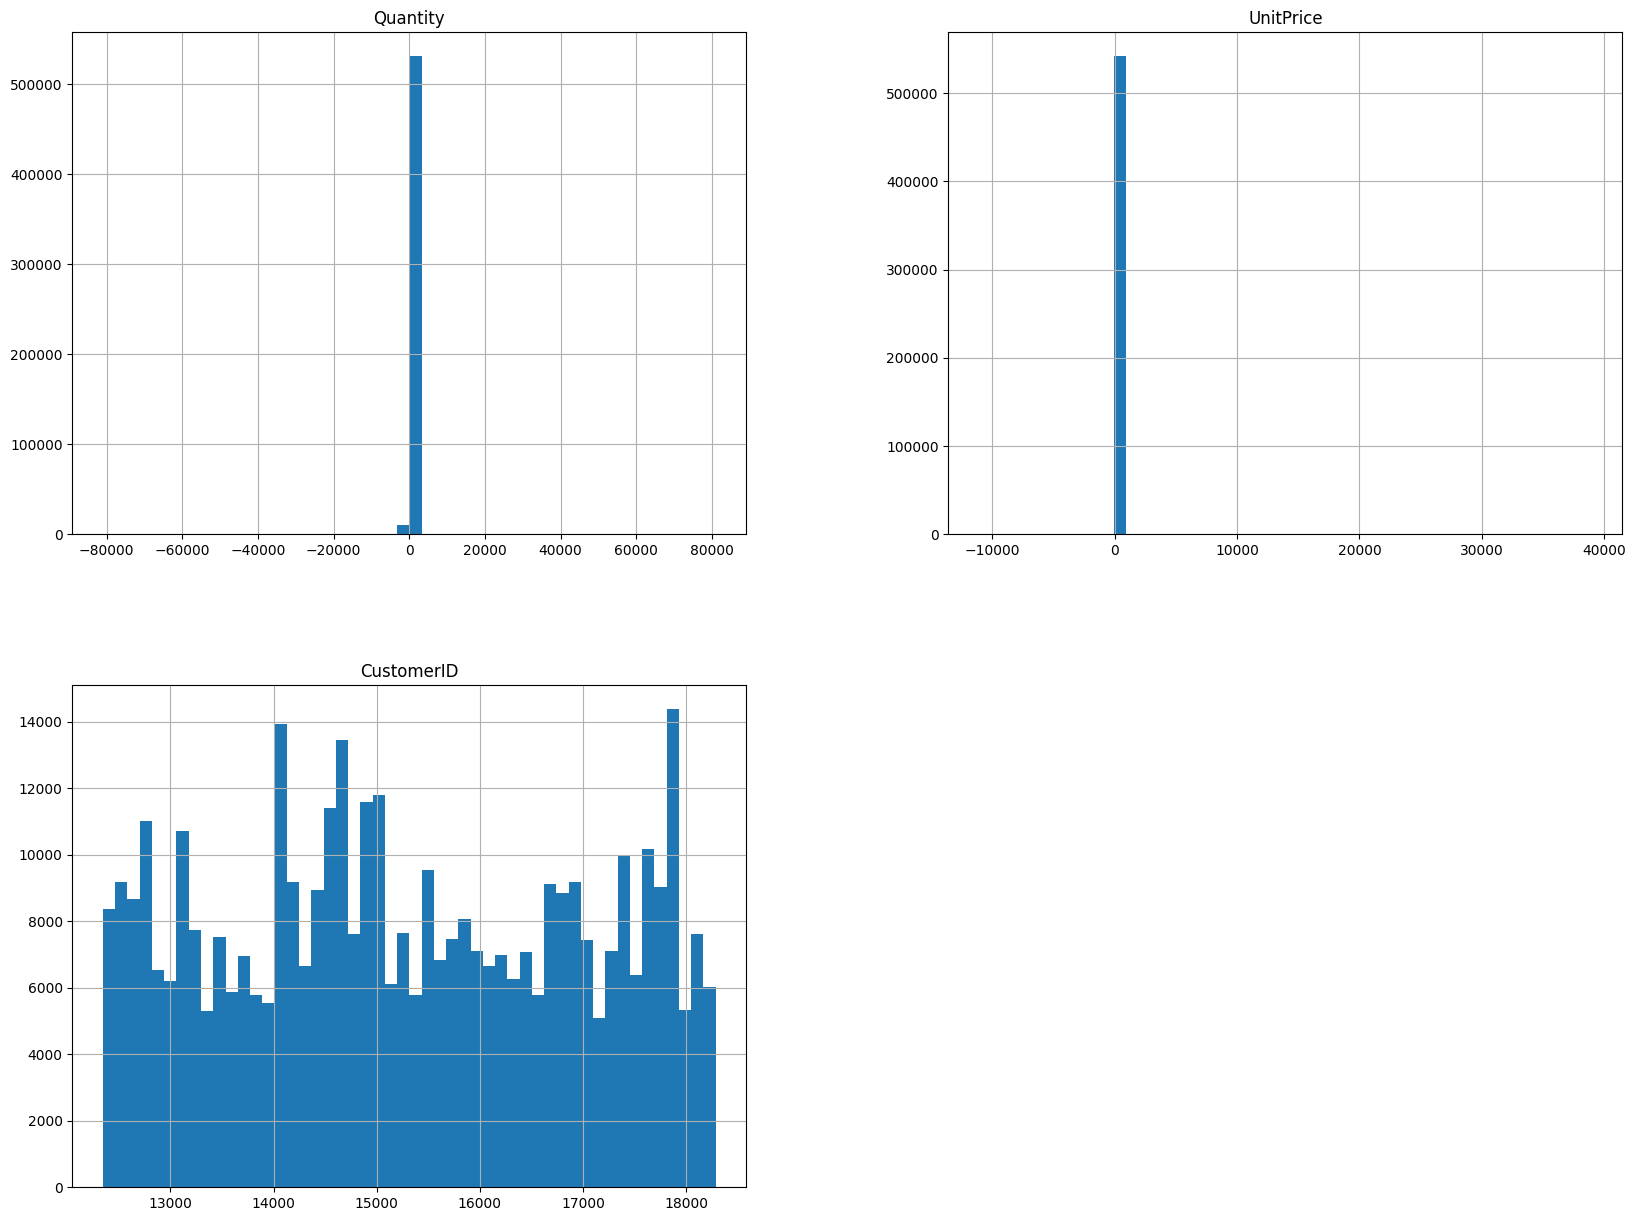

In [7]:
# Visualizacion de la distribucion de las variables (Visualiza la distribución de las variables en el dataset.)
data.hist(bins=50, figsize=(20,15))
plt.show()

# **Resultados de la Exploración Inicial**

**Primeras filas del dataset:**

El dataset contiene columnas como **InvoiceNo**, **StockCode**, **Description**, **Quantit**y, **InvoiceDate**, **UnitPrice**, **CustomerID**, y **Country**.

**Información general del dataset:**

El dataset tiene un total de 541,909 filas y 8 columnas.
Hay valores faltantes en las columnas Description y CustomerID.

**Descripción estadística del dataset:**

Proporciona un resumen estadístico de las columnas numéricas (Quantity, UnitPrice, CustomerID).

**Visualización de datos faltantes:**

Se observan valores faltantes en las columnas Description y CustomerID.

**Visualización de la distribución de las variables:**

Esto ayuda a entender la distribución de las columnas numéricas en el dataset.

## **Limpieza y Preparación de Datos**

In [8]:
# Eliminar filas con valores faltantes en CustomerID
data_cleaned = data.dropna(subset=['CustomerID'])

In [9]:
# Llenar valores faltantes en Description con 'No Description'
data_cleaned['Description'].fillna('No Description', inplace=True)

<ipython-input-9-53c5e88b9c91>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Description'].fillna('No Description', inplace=True)


In [10]:
# Convertir la columna InvoiceDate a datetime
data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'])

<ipython-input-10-71a408edcf2e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'])


In [11]:
# Eliminar filas con valores negativos en Quantity y UnitPrice
data_cleaned = data_cleaned[(data_cleaned['Quantity'] > 0) & (data_cleaned['UnitPrice'] > 0)]

In [12]:
# Mostrar las primeras filas del dataset limpio
print(data_cleaned.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [13]:
# Información general del dataset limpio
print(data_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB
None


In [14]:
# Descripción estadística del dataset limpio
print(data_cleaned.describe())

            Quantity                    InvoiceDate      UnitPrice  \
count  397884.000000                         397884  397884.000000   
mean       12.988238  2011-07-10 23:41:23.511023360       3.116488   
min         1.000000            2010-12-01 08:26:00       0.001000   
25%         2.000000            2011-04-07 11:12:00       1.250000   
50%         6.000000            2011-07-31 14:39:00       1.950000   
75%        12.000000            2011-10-20 14:33:00       3.750000   
max     80995.000000            2011-12-09 12:50:00    8142.750000   
std       179.331775                            NaN      22.097877   

          CustomerID  
count  397884.000000  
mean    15294.423453  
min     12346.000000  
25%     13969.000000  
50%     15159.000000  
75%     16795.000000  
max     18287.000000  
std      1713.141560  


# **Resultados de la Limpieza y Preparación de Datos**

**Primeras filas del dataset limpio:**

El dataset sigue conteniendo las columnas InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, y Country.

Se ha convertido InvoiceDate a tipo datetime y se han llenado los valores faltantes en Description con 'No Description'.

**Información general del dataset limpio:**

El dataset tiene ahora 397,884 filas y 8 columnas.

No hay valores faltantes en ninguna de las columnas.

**Descripción estadística del dataset limpio:**

La descripción estadística muestra las siguientes características:

**Quantity:** El promedio de la cantidad de productos por transacción es de aproximadamente 12.99, con un mínimo de 1 y un máximo de 80,995.

**UnitPrice:** El precio unitario promedio es de aproximadamente 3.12, con un mínimo de 0.001 y un máximo de 8,142.75.

**CustomerID:** El promedio de los ID de los clientes es 15,294.42, con un mínimo de 12,346 y un máximo de 18,287.

# **Análisis Descriptivo y Exploratorio**

Ahora que los datos están limpios, podemos proceder con el análisis descriptivo y exploratorio, que incluye:

**Análisis de Series Temporales:**

- Examinar las ventas a lo largo del tiempo.
- Identificar patrones estacionales y tendencias.

**Análisis de los Clientes:**

- Segmentación de clientes basada en su comportamiento de compra.
- Análisis de la distribución geográfica de los clientes.

**Análisis de los Productos:**

- Identificar los productos más vendidos.
- Examinar la rentabilidad de diferentes productos.

In [15]:
# Agrupar las ventas por mes
data_cleaned['Month'] = data_cleaned['InvoiceDate'].dt.to_period('M')
monthly_sales = data_cleaned.groupby('Month')['Quantity'].sum().reset_index()

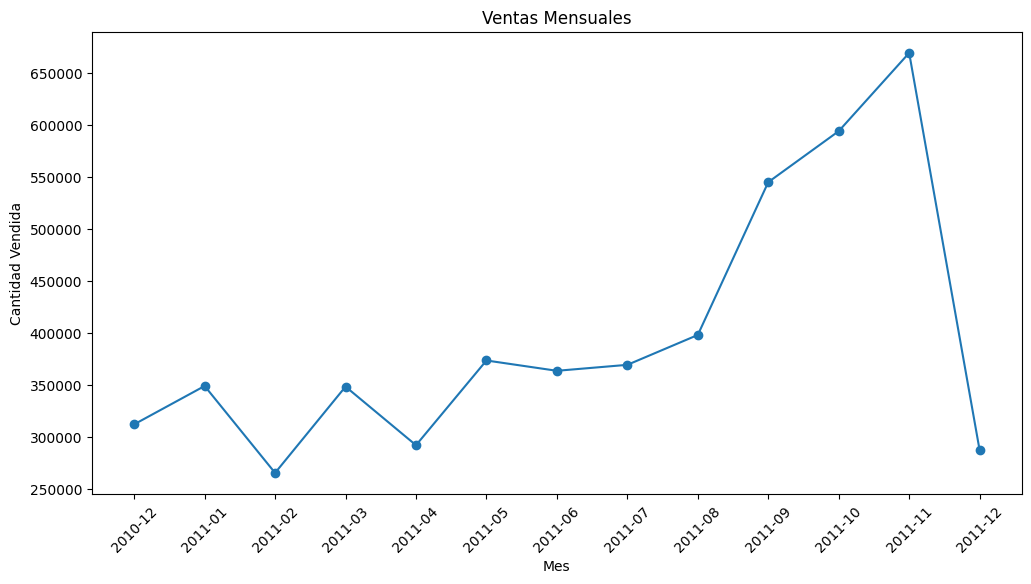

In [16]:
# Graficar las ventas mensuales
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Month'].astype(str), monthly_sales['Quantity'], marker='o')
plt.title('Ventas Mensuales')
plt.xlabel('Mes')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=45)
plt.show()

# **Análisis de los Clientes**

Para realizar el análisis de los clientes, vamos a segmentarlos basado en su comportamiento de compra y analizar la distribución geográfica de los clientes.

**Segmentación de Clientes**

Agrupar datos por CustomerID y calcular métricas clave:

- Número total de compras.
- Valor monetario total de las compras.
- Frecuencia de compra.

Implementar la segmentación RFM (Recency, Frequency, Monetary)

In [17]:
# Calcular Recency, Frequency y Monetary Value
import datetime as dt

In [18]:
# Fecha de referencia
reference_date = dt.datetime(2011, 12, 9)

In [19]:
# Calcular Recency (días desde la última compra)
rfm = data_cleaned.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceNo': 'count',
    'Quantity': 'sum',
    'UnitPrice': 'sum'
}).reset_index()

In [20]:
# Renombrar columnas
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Quantity', 'MonetaryValue']

In [21]:
# Mostrar las primeras filas del RFM
print(rfm.head())

   CustomerID  Recency  Frequency  Quantity  MonetaryValue
0     12346.0      324          1     74215           1.04
1     12347.0        1        182      2458         481.21
2     12348.0       74         31      2341         178.71
3     12349.0       17         73       631         605.10
4     12350.0      309         17       197          65.30


**Análisis de la Distribución Geográfica de los Clientes**

In [22]:
# Agrupar por país y contar el número de clientes únicos
country_data = data_cleaned.groupby('Country')['CustomerID'].nunique().reset_index()
country_data.columns = ['Country', 'NumCustomers']

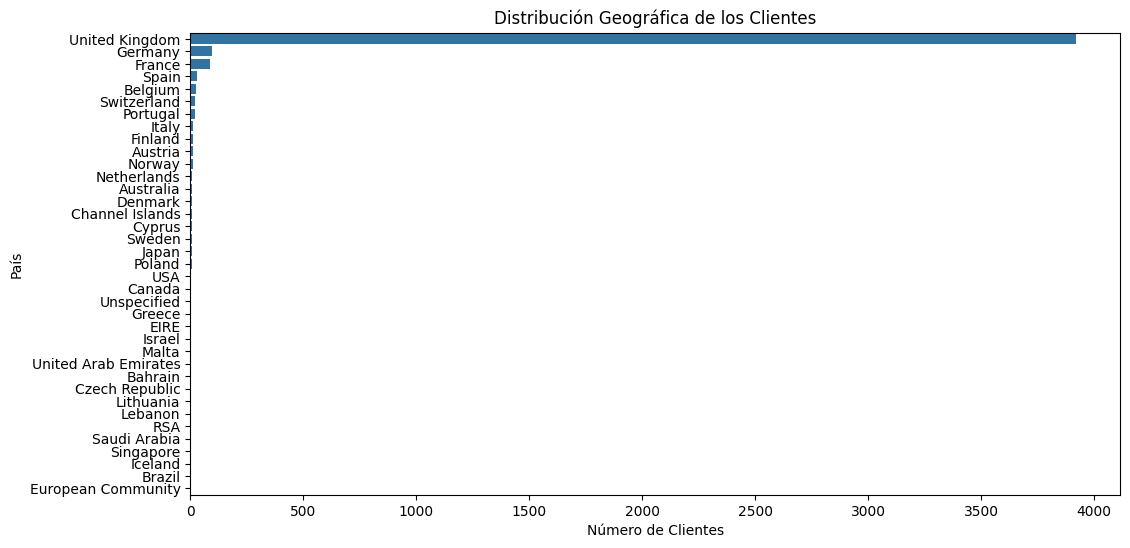

In [23]:
# Graficar la distribución geográfica de los clientes
plt.figure(figsize=(12, 6))
sns.barplot(x='NumCustomers', y='Country', data=country_data.sort_values('NumCustomers', ascending=False))
plt.title('Distribución Geográfica de los Clientes')
plt.xlabel('Número de Clientes')
plt.ylabel('País')
plt.show()

**Análisis de los Productos**

In [24]:
# Agrupar por producto y sumar la cantidad vendida
product_data = data_cleaned.groupby('Description')['Quantity'].sum().reset_index()

In [25]:
# Ordenar los productos por cantidad vendida
top_products = product_data.sort_values(by='Quantity', ascending=False).head(10)

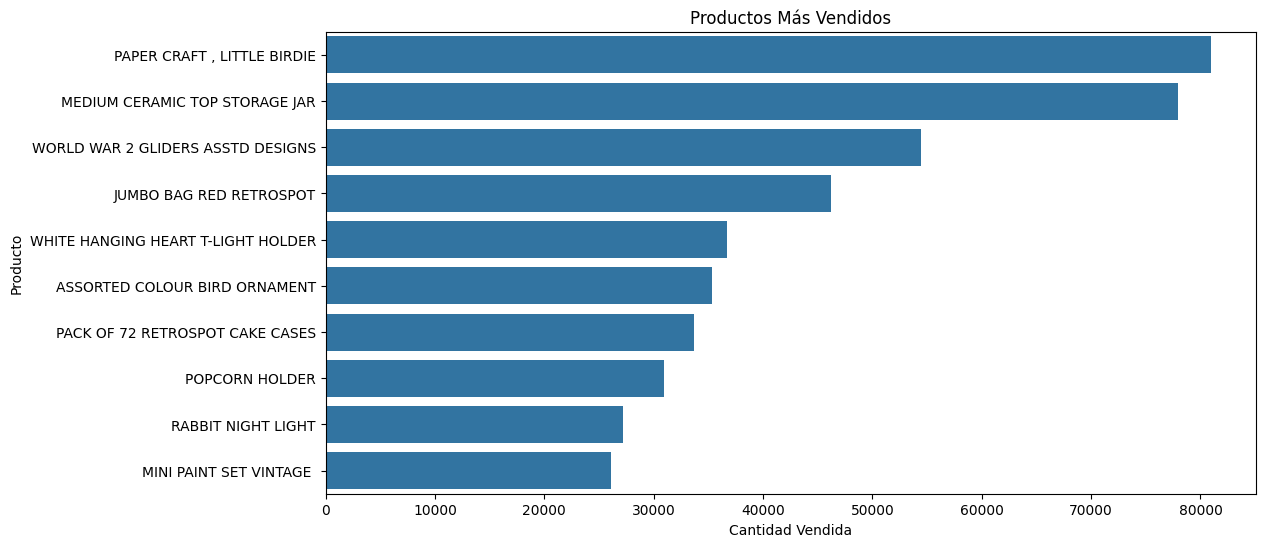

In [26]:
# Graficar los productos más vendidos
plt.figure(figsize=(12, 6))
sns.barplot(x='Quantity', y='Description', data=top_products)
plt.title('Productos Más Vendidos')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Producto')
plt.show()

**Análisis de la Rentabilidad de los Productos**

In [27]:
# Calcular el valor monetario total por producto
data_cleaned['TotalPrice'] = data_cleaned['Quantity'] * data_cleaned['UnitPrice']
product_profit = data_cleaned.groupby('Description')['TotalPrice'].sum().reset_index()

In [28]:
# Ordenar los productos por valor monetario total
top_profitable_products = product_profit.sort_values(by='TotalPrice', ascending=False).head(10)

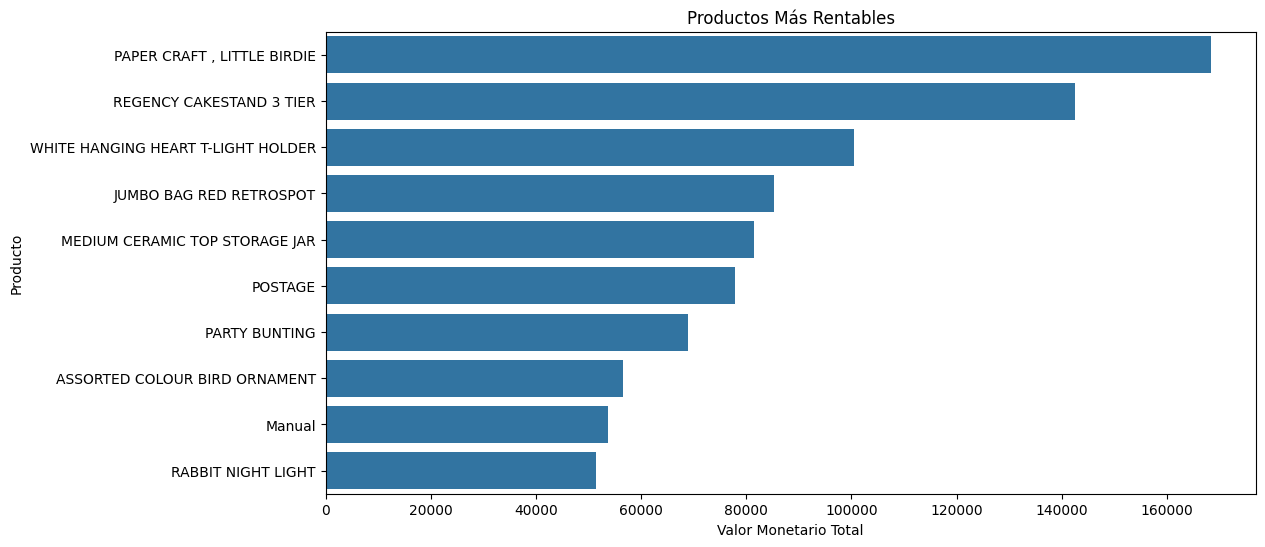

In [29]:
# Graficar los productos más rentables
plt.figure(figsize=(12, 6))
sns.barplot(x='TotalPrice', y='Description', data=top_profitable_products)
plt.title('Productos Más Rentables')
plt.xlabel('Valor Monetario Total')
plt.ylabel('Producto')
plt.show()